## Análisis exploratorio de datos (EDA)

### 1. Importación de archivos CSV

En esta sección se importan los tres archivos con los datos necesarios para el análisis:

- `/datasets/project_sql_result_01.csv`: contiene el nombre de la empresa de taxis y el número de viajes realizados el 15 y 16 de noviembre de 2017.
- `/datasets/project_sql_result_04.csv`: contiene los barrios donde terminaron los viajes y el promedio de viajes que finalizaron allí en noviembre de 2017.
- `/datasets/project_sql_result_07.csv`: contiene datos de los viajes desde el Loop hasta el Aeropuerto Internacional O’Hare, incluyendo fecha, condiciones climáticas y duración del viaje.

In [75]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
# Cargar los archivos desde la carpeta /datasets
df1 = pd.read_csv('project_sql_result_01.csv')
df2 = pd.read_csv('project_sql_result_04.csv')
df3 = pd.read_csv('project_sql_result_07.csv')

# Verificar la carga
print("Archivos cargados correctamente.\n")

print("Archivo 1:")
print(df1.head(), "\n")

print("Archivo 2:")
print(df2.head(), "\n")

print("Archivo 3:")
print(df3.head())


Archivos cargados correctamente.

Archivo 1:
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299 

Archivo 2:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000 

Archivo 3:
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


### 2. Revisión inicial de los dataset 

En este paso verificamos la estructura y calidad del primer conjunto de datos, que contiene el número de viajes realizados por cada empresa de taxis el 15 y 16 de noviembre de 2017.

Pasos realizados:

1. Consultar la información general del DataFrame con `info()` para revisar tipos de datos y cantidad de valores no nulos.
2. Visualizar las primeras filas con `head()` para confirmar el formato.
3. Comprobar si existen valores nulos mediante `isna().sum()`.
4. Verificar cuántas empresas únicas hay en la columna `company_name`.
5. Mostrar las últimas filas con `tail()` para detectar posibles valores atípicos o nombres inconsistentes.

El objetivo es asegurarse de que los datos estén completos y correctamente tipados antes de realizar transformaciones o análisis más profundos.

### 2.1 Archivo project_sql_result_01 - Primer Archivo

In [77]:

# Revisar tipos de datos y valores nulos
print("Información del DataFrame:\n")
print(df1.info())

# Ver algunas filas para confirmar formato visualmente
print("\nPrimeras filas:\n")
print(df1.head())

# Revisar si hay valores nulos o extraños
print("\nValores nulos por columna:\n")
print(df1.isna().sum())

# Revisar tipos únicos en cada columna
print("\nCantidad de empresas únicas:", df1['company_name'].nunique())

# Mostrar los últimos 5 registros del DataFrame
df1.tail()



Información del DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

Primeras filas:

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

Valores nulos por columna:

company_name    0
trips_amount    0
dtype: int64

Cantidad de empresas únicas: 64


,company_name,trips_amount
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3
63,3556 - 36214 RC Andrews Cab,2


### Revisión del primer archivo

Se identificaron **64 empresas únicas** en el dataset.  
Al revisar las últimas filas, se observa que algunas contienen **valores numéricos al inicio del nombre de la empresa**, posiblemente correspondientes a **identificadores o códigos internos**, no al nombre real.

| Índice | company_name                      | trips_amount |
|:------:|:----------------------------------|--------------:|
| 59 | 4053 - 40193 Adwar H. Nikola         | 7  |
| 60 | 2733 - 74600 Benny Jona              | 7  |
| 61 | 5874 - 73628 Sergey Cab Corp.        | 5  |
| 62 | 2241 - 44667 - Felman Corp           | 3  |
| 63 | 3556 - 36214 RC Andrews Cab          | 2  |

 **Conclusión:**  
Estos prefijos numéricos deben limpiarse para mantener uniformidad en los nombres de las compañías antes del análisis.



In [78]:
# Eliminar números y guiones al inicio del nombre
df1['company_name'] = df1['company_name'].str.replace(r'^\d+\s*-\s*\d*\s*-*\s*', '', regex=True).str.strip()

# Verificar los últimos 10 nombres después de la limpieza
df1['company_name'].tail(10)

54                  Zeymane Corp
55                  Richard Addo
56              AW Services Inc.
57                   Metro Group
58                    Sam Mestas
59               Adwar H. Nikola
60                    Benny Jona
61              Sergey Cab Corp.
62    Felman Corp, Manuel Alonso
63                RC Andrews Cab
Name: company_name, dtype: object

### Verificación de tipos de datos

Se revisaron los tipos de datos de cada columna en el DataFrame `df1`:

| Columna        | Tipo de dato | Valores nulos | Descripción |
|----------------|---------------|----------------|--------------|
| `company_name` | `object`      | 0              | Nombre de la empresa de taxis |
| `trips_amount` | `int64`       | 0              | Cantidad de viajes realizados |

 **Conclusión:**  
- Los tipos de datos son **correctos**: `company_name` como texto (`object`) y `trips_amount` como número entero (`int64`).  
- No se encontraron valores nulos ni inconsistencias en las columnas.  


### 2.2 Archivo project_sql_result_04 - Segundo Archivo

In [79]:
# Revisar tipos de datos y valores nulos del segundo archivo
print("Información del DataFrame:\n")
print(df2.info())

# Mostrar primeras filas
print("\nPrimeras filas:\n")
print(df2.head())

# Revisar valores nulos
print("\nValores nulos por columna:\n")
print(df2.isna().sum())

# Mostrar últimos 5 registros
print("\nÚltimos registros:\n")
print(df2.tail())

# Revisar cantidad de valores únicos
print("\nCantidad de ubicaciones únicas:", df2['dropoff_location_name'].nunique())


Información del DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None

Primeras filas:

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000

Valores nulos por columna:

dropoff_location_name    0
average_trips            0
dtype: int64

Últimos registros:

   dropoff_location_name  average_trips
89       Mount Greenwood       3.137931
90             Hegewisch       3.117647
91              Burnside       2.333333
92             East Side       1.961538
93             Riverdale       1.800

### Revision del segundo archivo

### Información general

* **Número de registros:** 94
* **Número de columnas:** 2
* **Columnas y tipos de datos:**

  * `dropoff_location_name` → *object* (cadena de texto)
  * `average_trips` → *float64* (número decimal)

No se encontraron valores nulos.

### Descripción de las columnas

* **`dropoff_location_name`**: Nombre del vecindario o zona de destino donde finalizaron los viajes.
* **`average_trips`**: Promedio de viajes realizados a cada zona durante noviembre de 2017.

### Observaciones

* Los datos parecen correctos en cuanto a tipo: nombres de ubicaciones como texto y promedios como números.
* El total de ubicaciones únicas es **94**.

### Zonas con mayor actividad

  * Loop → 10,727.47 viajes promedio
  * River North → 9,523.67
  * Streeterville → 6,664.67

### Zonas con menor actividad

Los últimos registros muestran zonas periféricas con menos viajes:

* Burnside → 2.33
* East Side → 1.96
* Riverdale → 1.80

**Conclusión:** Los datos están limpios, completos y con tipos de datos correctos. Se pueden usar directamente para visualización o cruces con otros conjuntos.


### 2.3 Archivo project_sql_result_07

In [80]:
# Revisar tipos de datos y valores nulos del tercer archivo

print("Información del DataFrame:\n")
print(df3.info())

print("\nPrimeras filas:\n")
print(df3.head())

print("\nValores nulos por columna:\n")
print(df3.isna().sum())

print("\nCantidad de valores únicos por columna:\n")
for col in df3.columns:
    print(f"  - {col}: {df3[col].nunique()}")

print("\nÚltimos registros:\n")
print(df3.tail())


Información del DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None

Primeras filas:

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0

Valores nulos por columna:

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

Cantidad de valores únicos por columna:

  - start_ts: 81
  - weather_

### Revisión del tercer archivo

**Propósito:**
Este archivo contiene información sobre viajes con sus condiciones meteorológicas y duración en segundos.

**Resultados del análisis inicial:**

* **Filas totales:** 1068
* **Columnas:** 3 (`start_ts`, `weather_conditions`, `duration_seconds`)
* **Valores nulos:** No se encontraron valores nulos.
* **Tipos de datos:**

  * `start_ts`: *object* → requiere conversión a formato `datetime` para análisis temporal.
  * `weather_conditions`: *object* (dos categorías: *Good* y *Bad*).
  * `duration_seconds`: *float64*.

**Valores únicos:**

* `start_ts`: 81 valores únicos (corresponde a fechas y horas distintas).
* `weather_conditions`: 2 valores (*Good*, *Bad*).
* `duration_seconds`: 495 valores distintos.

**Observaciones:**

* Los datos parecen estar completos
* Se detectan algunos valores de duración igual a 0, que podrían requerir revisión o exclusión en el análisis posterior.
* Se debe convertir la columna `start_ts` a tipo `datetime` antes de realizar análisis de tiempo o agrupaciones por fecha.


### 3. Se realiza el cambio de la columna `start_ts` a tipo `datetime`

In [81]:
# Convertir la columna 'start_ts' a tipo datetime
df3['start_ts'] = pd.to_datetime(df3['start_ts'], errors='coerce')

# Verificar el cambio
print("Tipos de datos actualizados:\n")
print(df3.dtypes)

# Comprobar que no haya valores nulos generados por errores en la conversión
print("\nValores nulos después de la conversión:\n")
print(df3['start_ts'].isna().sum())

# Mostrar las primeras filas para confirmar formato
print("\nPrimeras filas con formato datetime:\n")
print(df3.head())


Tipos de datos actualizados:

start_ts              datetime64[ns]
weather_conditions            object
duration_seconds             float64
dtype: object

Valores nulos después de la conversión:

0

Primeras filas con formato datetime:

             start_ts weather_conditions  duration_seconds
0 2017-11-25 16:00:00               Good            2410.0
1 2017-11-25 14:00:00               Good            1920.0
2 2017-11-25 12:00:00               Good            1543.0
3 2017-11-04 10:00:00               Good            2512.0
4 2017-11-11 07:00:00               Good            1440.0


### 4. Identificar los 10 principales barrios en términos de finalización del recorrido

In [82]:

# Calcular el total de viajes promedio
total_trips = df2['average_trips'].sum()

# Crear una nueva columna con el porcentaje de viajes
df2['percentage'] = (df2['average_trips'] / total_trips) * 100

# Ordenar de mayor a menor y mostrar los 10 principales
top10_barrios = df2.sort_values(by='average_trips', ascending=False).head(10)

# Mostrar resultados
print("Top 10 barrios con mayor cantidad promedio de viajes (con porcentaje):\n")
print(top10_barrios[['dropoff_location_name', 'average_trips', 'percentage']])



Top 10 barrios con mayor cantidad promedio de viajes (con porcentaje):

  dropoff_location_name  average_trips  percentage
0                  Loop   10727.466667   19.021798
1           River North    9523.666667   16.887236
2         Streeterville    6664.666667   11.817696
3             West Loop    5163.666667    9.156143
4                O'Hare    2546.900000    4.516128
5             Lake View    2420.966667    4.292825
6            Grant Park    2068.533333    3.667895
7         Museum Campus    1510.000000    2.677511
8            Gold Coast    1364.233333    2.419040
9    Sheffield & DePaul    1259.766667    2.233801




**Conclusión:**
Las zonas Loop y River North concentran más del 35 % de los viajes totales, lo que confirma que son los principales destinos dentro de la ciudad.
Esto puede reflejar una alta densidad de oficinas, turismo y centros comerciales en estas áreas.



### 5 Hacer gráficos:

### 5.1 Empresas de taxis y número de viajes

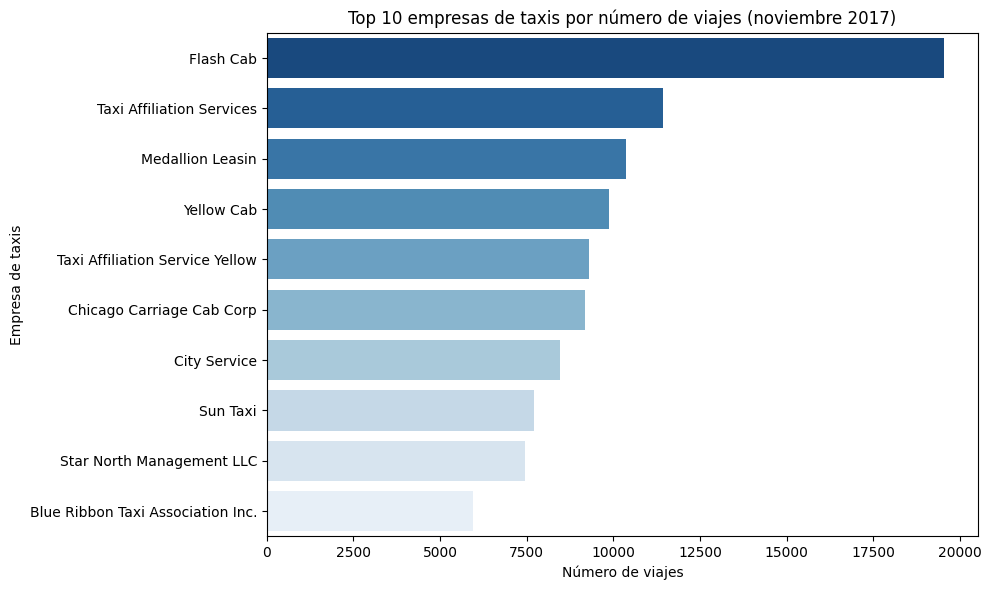

In [83]:
# Gráfico: empresas con más viajes
top_companies = df1.sort_values(by='trips_amount', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='trips_amount',
    y='company_name',
    data=top_companies,
    hue='company_name',         # agregamos hue
    palette='Blues_r',
    legend=False                # ocultamos la leyenda
)
plt.title('Top 10 empresas de taxis por número de viajes (noviembre 2017)')
plt.xlabel('Número de viajes')
plt.ylabel('Empresa de taxis')
plt.tight_layout()
plt.show()



### 5.2 Los 10 barrios principales por número de finalizaciones 

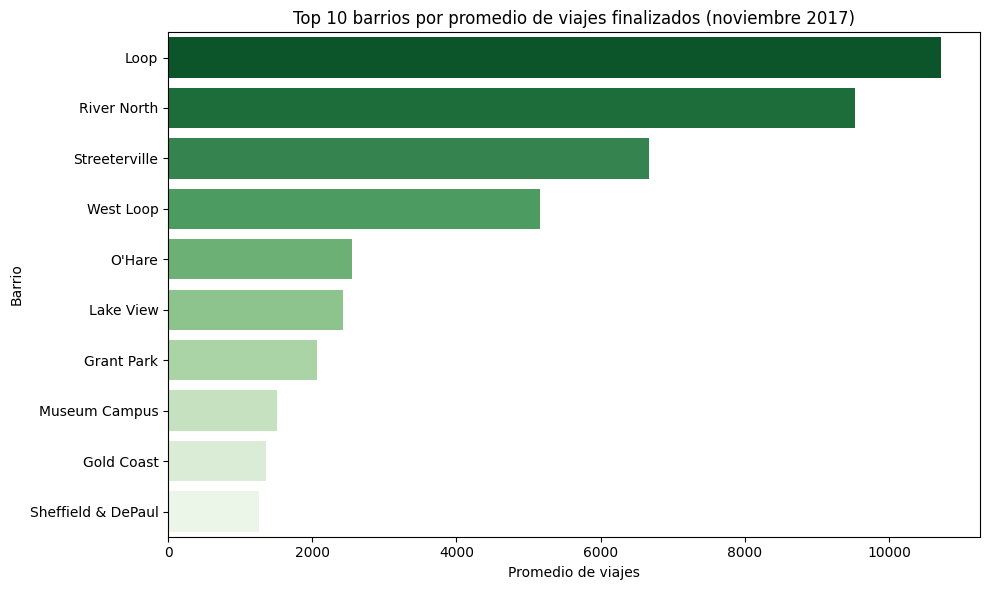

In [84]:
# Gráfico: barrios con más viajes promedio
top_neighborhoods = df2.sort_values(by='average_trips', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='average_trips',
    y='dropoff_location_name',
    data=top_neighborhoods,
    hue='dropoff_location_name',  # Agregamos hue
    palette='Greens_r',
    legend=False                  # Ocultamos la leyenda innecesaria
)
plt.title('Top 10 barrios por promedio de viajes finalizados (noviembre 2017)')
plt.xlabel('Promedio de viajes')
plt.ylabel('Barrio')
plt.tight_layout()
plt.show()



### 6. Sacar conclusiones basadas en cada gráfico y explicar los resultados

### 6.1. Gráfico: Top 10 empresas de taxis por número de viajes (noviembre 2017)

### Observaciones:

Flash Cab lidera ampliamente con casi 20,000 viajes, significativamente más que las demás.

Taxi Affiliation Services y Medallion Leasing siguen en el segundo y tercer lugar, pero con aproximadamente la mitad de viajes que Flash Cab.

###Conclusión:

Existe una clara concentración de mercado: unas pocas compañías dominan la prestación del servicio de taxi en noviembre de 2017.

Esto puede reflejar preferencias de los usuarios, flotas más grandes, mejor cobertura o reputación de servicio de las empresas líderes.

Las empresas que están fuera del top 3 podrían enfocarse en mejorar marketing o eficiencia para aumentar su participación

### 6.2. Gráfico: Top 10 barrios por promedio de viajes finalizados (noviembre 2017)

### Observaciones:

Loop y River North concentran más del 35 % del total de viajes promedio, siendo los destinos más frecuentes.

Barrios como Streeterville y West Loop también muestran actividad considerable, pero menor que los dos principales.

Zonas como Museum Campus, Gold Coast o Sheffield & DePaul tienen un promedio de viajes mucho menor (menos del 3 % cada una).

### Conclusión:

Los taxis se utilizan más en áreas con alta densidad como Loop y River North.

Esta información puede ser útil para planificación de rutas, ubicación de paradas de taxi o estrategias de precios dinámicos.

Las zonas con menor actividad podrían ser foco de promociones o incentivos para aumentar la cobertura.

## Paso 5. Prueba de hipótesis (Python)

### Planteamiento de hipótesis

Queremos probar si la duración promedio de los viajes cambia los sábados lluviosos

Hipótesis nula (H₀): La duración promedio de los viajes no cambia en días lluviosos frente a días sin lluvia.

Hipótesis alternativa (Hₐ): La duración promedio de los viajes sí cambia en días lluviosos.

Prueba: t-test de Welch (dos muestras independientes, varianzas desiguales).

Nivel de significación: α = 0.05

#### Primero vamos a validar si hay registros de los días sabados en el tercer archivo

In [85]:
# Convertir start_ts a datetime
df3['start_ts'] = pd.to_datetime(df3['start_ts'])

# Crear columna con nombre del día de la semana
df3['dia_semana'] = df3['start_ts'].dt.day_name()

# Extraer solo fechas únicas (sin horas) con su día de la semana
dias_unicos = df3[['start_ts', 'dia_semana']].copy()
dias_unicos['fecha'] = dias_unicos['start_ts'].dt.date
dias_unicos = dias_unicos[['fecha', 'dia_semana']].drop_duplicates().sort_values('fecha')

print("Días con registros y su día de la semana:")
print(dias_unicos)

# Rango de fechas
fecha_min = df3['start_ts'].min().date()
fecha_max = df3['start_ts'].max().date()
print(f"\nRango de fechas: {fecha_min} a {fecha_max}")





Días con registros y su día de la semana:
        fecha dia_semana
3  2017-11-04   Saturday
4  2017-11-11   Saturday
7  2017-11-18   Saturday
0  2017-11-25   Saturday

Rango de fechas: 2017-11-04 a 2017-11-25


* El tercer archivo cuenta con registro de 4 dias, los cuales son días sabados

In [86]:
import pandas as pd
from scipy import stats

# df3 ya está cargado
df3['start_ts'] = pd.to_datetime(df3['start_ts'])

# Filtrar días lluviosos y no lluviosos
rain_trips = df3[df3['weather_conditions'].str.contains('Bad', case=False, na=False)]
good_trips = df3[df3['weather_conditions'].str.contains('Good', case=False, na=False)]

# Duraciones de cada grupo
dur_rain = rain_trips['duration_seconds']
dur_good = good_trips['duration_seconds']

# Prueba t de Welch (varianzas desiguales)
t_stat, p_value = stats.ttest_ind(dur_rain, dur_good, equal_var=False)

# Nivel de significación
alpha = 0.05

# Resultados
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.3f}")

if p_value < alpha:
    print("Rechazamos H0: La duración promedio sí cambia en días lluviosos.")
else:
    print("No rechazamos H0: No hay evidencia suficiente de cambio en la duración promedio.")


t-statistic: 7.186
p-value: 0.000
Rechazamos H0: La duración promedio sí cambia en días lluviosos.


### Conclusión de la prueba de hipótesis

Se evaluó si “la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O’Hare cambia en días lluviosos”.

Hipótesis nula (H₀): La duración promedio no cambia en días lluviosos frente a días sin lluvia.

Hipótesis alternativa (Hₐ): La duración promedio sí cambia en días lluviosos.

Se aplicó un t-test de Welch para comparar las duraciones entre días lluviosos (Bad) y días sin lluvia (Good), con un nivel de significación 𝛼 = 0.05.

### Resultados:

t-statistic: 7.186

p-value: 0.000


### Interpretación:

Como el p-value es menor que 0.05, rechazamos H₀. Esto indica que la duración promedio de los viajes sí cambia en días lluviosos.

### Observación:

Los días lluviosos tienden a afectar la duración del viaje, probablemente debido a tráfico más lento, precaución del conductor y condiciones de la vía.